# An Analysis of the Relatinoship in Between Social-economic factors and Urban Fire in London #

## 1 Introduction

Urban fire can lead to significant casualty and property damage. Based on the record from London Fire Brigade and National Statistics report, London, as the largest and dense city in the UK, accounted for around 10% of the recorded fire incidents in recent years.(London.gov.uk, 2020; National Statistics,2019) Therefore, if we are able to identify the patterns of urban fire and the potential factors, more precautions could be taken in advance, and then urban fire incidents might be prevented. As a result, the amount of losses and risks could be lessened in the long run. 

The investigation of urban fire in this work mainly focuses on dwelling related fire incidents, which makes up for the most incidents in London based on the record from London Fire Brigade from 2013 to 2019. A study found Fatal unintentional domestic fire incidents has something to do with socioeconomic deprivation in New Zealand. (Duncanson, Woodward and Reid, 2002) And a study in Canada also indicated socioeconomic factors affect the dwelling related fire incidents. (Beaulieu et al., 2019) 
Hence, the two main objectives of this work are to find if there are spatial and temporal patterns of fire incidents, and then to investigate potential social-economic factors and house characters that might link to fire incidents. In order to identify the patterns heatmap and choropleth map are employed. For the purpose of examining the relationships regression machine learning techniques are applied. Among the regression algorithms Ordinary least squares (OLS) regression, Least Absolute Shrinkage and Selection Operator(Lasso) and Principal component analysis (PCA) linear regression are utilised to compare the results.  

The framework of this project includes section 2 for data interrogation, section 3 about methodology implementation, section 4 results analysis, and drawing conclusion in section 5.


In [1]:
# import pandas, matplotlib, numpy libraries, and seaborn, and set the alias as pd, plt, np, and sns accordingly 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

## 2 Data Interrogation

The datasets used in this project are on wards level and consist of two parts, which are the fire incident records from London Fire Brigade from 2013 to 2019 (this data are separated into two files, from 2013 to 2016 and from 2017 to 2020), and wards profile for the most recent year (2010, 2011, or 2015) from Greater London Authority (GLA). 

Datasets are available from the links:
- **Fire Incidents**: https://data.london.gov.uk/dataset/london-fire-brigade-incident-records 
- **Wards profile**: https://data.london.gov.uk/dataset/ward-profiles-and-atlas 

Since both datasets contain many columns, it may affect the efficiency of data processing. Hence, in order to accelerate data processing only the columns used here are extracted.

Extracted columns from fire incident records datasets:
- For showing temporal pattern 
    - DateOfCall: calling date
    - HourOfCall: calling hour
- For displaying spatial pattern   
    - IncGeo_BoroughCode
    - IncGeo_BoroughName
    - IncGeo_WardCode
    - IncGeo_WardName
- Dependent variable and displaying spatial pattern
    - Incidents: this column will be standardise by households. 
    
Extracted columns from ward profile dataset:
- Independent variables:
    - % All Older people aged 65+ - 2015: percentage of older people population in 2015.
    - % All Children aged 0-15 - 2015: percentage of children population in 2015.
    - % English is First Language of no one in household - 2011: ethnicity data in 2011.
    - Rates of ambulance call outs for alcohol related illness - 2014: this might be related to alcohol abused, and Holborn, Nolan and Golt (2003) analysed this factor could be a risk in causing the unintentional dwelling fire deaths.
    - Employment rate (16-64) - 2011
    - Median House Price (£) - 2014
    - (ID2010) - Rank of average score (within London) - 2010: This is Indices of Deprivation score Rank in 2010.
    - % Households Private Rented - 2011
    - % Households Social Rented - 2011
    - % Flat, maisonette or apartment - 2011
    - % semi-detached houses - 2011
    - % dependent children (0-18) in out-of-work households - 2014
    - % with no qualifications - 2011: it indicates the percentage of no education qualifications. 
    - % area that is open space - 2014: open space rate.
    - Violence against the person rate - 2014/15
- For standardised purpose:    
    - Number of Household spaces - 2011: this is defined as an accommodation used by an individual household by Office National Statistics. (www.ons.gov.uk, n.d.)


### 2.1 Data Cleaning

In [2]:
# load fire incident dataset from 2013 to 2016
data1316 = pd.read_csv("fire1316.csv")

# show info
data1316.info()
data1316.head(10)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403985 entries, 0 to 403984
Data columns (total 31 columns):
IncidentNumber                            403985 non-null object
DateOfCall                                403985 non-null object
CalYear                                   403985 non-null int64
TimeOfCall                                403985 non-null object
HourOfCall                                403985 non-null int64
IncidentGroup                             403984 non-null object
StopCodeDescription                       403984 non-null object
SpecialServiceType                        123086 non-null object
PropertyCategory                          403984 non-null object
PropertyType                              403984 non-null object
AddressQualifier                          403985 non-null object
Postcode_full                             215034 non-null object
Postcode_district                         403985 non-null object
IncGeo_BoroughCode                        4039

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending
0,1131,01-Jan-13,2013,00:02:06,0,False Alarm,AFA,NaN,Other Residential,Boarding House/B&B for homeless/asylum seekers,...,525450,184850,London,West Hampstead,167.0,West Hampstead,NaN,NaN,1.0,1.0
1,4131,01-Jan-13,2013,00:02:09,0,False Alarm,AFA,NaN,Non Residential,Single shop,...,515450,185450,London,Northolt,236.0,Northolt,NaN,NaN,1.0,1.0
2,5131,01-Jan-13,2013,00:02:54,0,False Alarm,AFA,NaN,Non Residential,Other cultural venue,...,522450,178650,London,Hammersmith,218.0,Hammersmith,NaN,NaN,1.0,1.0
3,2131,01-Jan-13,2013,00:03:02,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,527850,181050,London,Soho,426.0,Knightsbridge,NaN,NaN,1.0,1.0
4,3131,01-Jan-13,2013,00:03:03,0,False Alarm,AFA,NaN,Non Residential,Purpose built office,...,533350,180750,London,Whitechapel,346.0,Dowgate,NaN,NaN,2.0,2.0
5,6131,01-Jan-13,2013,00:05:16,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,520750,186650,London,Willesden,323.0,Willesden,NaN,NaN,1.0,1.0
6,7131,01-Jan-13,2013,00:05:24,0,False Alarm,AFA,NaN,Non Residential,Church/Chapel,...,525050,184050,London,West Hampstead,448.0,Belsize,NaN,NaN,1.0,1.0
7,10131,01-Jan-13,2013,00:08:18,0,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,527450,173250,London,Tooting,150.0,Tooting,NaN,NaN,2.0,3.0
8,13131,01-Jan-13,2013,00:12:16,0,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,540650,185750,London,Stratford,222.0,Stratford,NaN,NaN,1.0,2.0
9,15131,01-Jan-13,2013,00:16:39,0,False Alarm,AFA,NaN,Other Residential,Hotel/motel,...,508650,176950,London,Heathrow,274.0,Heathrow,NaN,NaN,1.0,1.0


In [3]:
# load fire incident dataset from 2016 to 2019
data1720 = pd.read_csv("fire1720.csv")

# show info
data1720.info()
data1720.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338507 entries, 0 to 338506
Data columns (total 36 columns):
IncidentNumber                            338507 non-null object
DateOfCall                                338507 non-null object
CalYear                                   338507 non-null int64
TimeOfCall                                338507 non-null object
HourOfCall                                338507 non-null int64
IncidentGroup                             338507 non-null object
StopCodeDescription                       338507 non-null object
SpecialServiceType                        106047 non-null object
PropertyCategory                          338507 non-null object
PropertyType                              338507 non-null object
AddressQualifier                          338507 non-null object
Postcode_full                             170483 non-null object
Postcode_district                         338507 non-null object
IncGeo_BoroughCode                        3385

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,000209-01012017,01/01/2017,2017,09:20:00,9,Special Service,Special Service,RTC,Road Vehicle,Car,...,Purley,281.0,Purley,528.0,Wallington,2.0,2.0,2.0,1.0,326.0
1,000302-01012017,01/01/2017,2017,14:26:23,14,False Alarm,AFA,NaN,Non Residential,Large supermarket,...,Purley,273.0,Purley,NaN,NaN,1.0,1.0,1.0,1.0,326.0
2,000149-01012017,01/01/2017,2017,05:25:50,5,Fire,Primary Fire,NaN,Road Vehicle,Car,...,Biggin Hill,540.0,Biggin Hill,NaN,NaN,1.0,1.0,1.0,2.0,652.0
3,000240-01012017,01/01/2017,2017,10:51:35,10,Special Service,Special Service,Effecting entry/exit,Other Residential,Nursing/Care Home/Hospice,...,Wallington,190.0,Wallington,NaN,NaN,1.0,1.0,1.0,1.0,326.0
4,000236-01012017,01/01/2017,2017,10:41:53,10,False Alarm,False alarm - Good intent,NaN,Non Residential,Single shop,...,Croydon,313.0,Norbury,363.0,Purley,2.0,2.0,2.0,1.0,326.0
5,000271-01012017,01/01/2017,2017,12:48:14,12,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,Croydon,492.0,Wallington,NaN,NaN,1.0,1.0,1.0,1.0,326.0
6,000156-01012017,01/01/2017,2017,05:50:35,5,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,Sutton,330.0,Sutton,NaN,NaN,1.0,1.0,1.0,1.0,326.0
7,000069-01012017,01/01/2017,2017,01:26:35,1,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,Wallington,177.0,Wallington,382.0,Croydon,2.0,2.0,2.0,1.0,326.0
8,000260-01012017,01/01/2017,2017,12:23:37,12,Special Service,Special Service,Animal assistance incidents,Non Residential,Single shop,...,Croydon,871.0,Woodside,NaN,NaN,1.0,1.0,1.0,1.0,326.0
9,000290-01012017,01/01/2017,2017,13:39:44,13,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,...,Croydon,267.0,Woodside,NaN,NaN,2.0,3.0,3.0,1.0,326.0


After loading data, we need to concatenate two files into one dataframe, and subset the needed columns. However, we can see some problems in these datasets, firstly, there is some missing data or not geo-coded location data in these two files, and this null data will affect analysis. In addition, based on the column of "IncidentGroup", it appears that some of the records contain 'false alarm' and 'Special Service'. And based on 'PropertyCategory' column, it includes all type of incidents, which should be discarded. Also the format of 'DateOfCall' column varies in two datasets. Besides, this work only analyses the data until 2019, so the data needs to be dropped, too. 

Therefore, next step after concatenating two datasets is to drop the null data, 'false alarm', incidents other than dwelling category and data in 2020. As for the formats of 'DataOfCall' will be replaced afterwards.


In [4]:
# concatenate two datasets and then drop null data
data1320 = pd.concat([data1316, data1720], ignore_index=True, sort=False)

# using logic statement to exclude 'False alarm', 'Special Service', and data in 2020
data1319 = data1320.loc[(data1320['IncidentGroup'] == "Fire") & (data1320['PropertyCategory'] == "Dwelling") & (data1320['CalYear'] !=2020) &(data1320['IncGeo_WardName'] !=' Not geo-coded')]
# subset columns
data1319 = data1319[['DateOfCall','HourOfCall','CalYear','IncGeo_BoroughCode','IncGeo_BoroughName','IncGeo_WardCode','IncGeo_WardName']].dropna()

data1319.head(10)

,DateOfCall,HourOfCall,CalYear,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName
8,01-Jan-13,0,2013,E09000025,NEWHAM,E05000483,Forest Gate North
18,01-Jan-13,0,2013,E09000005,BRENT,E05000101,Sudbury
33,01-Jan-13,1,2013,E09000005,BRENT,E05000091,Harlesden
37,01-Jan-13,2,2013,E09000014,HARINGEY,E05000280,Tottenham Green
39,01-Jan-13,2,2013,E09000003,BARNET,E05000049,East Finchley
83,01-Jan-13,5,2013,E09000022,LAMBETH,E05000427,Prince's
88,01-Jan-13,6,2013,E09000028,SOUTHWARK,E05000550,South Bermondsey
98,01-Jan-13,8,2013,E09000012,HACKNEY,E05009367,Brownswood
99,01-Jan-13,8,2013,E09000026,REDBRIDGE,E05000514,Valentines
133,01-Jan-13,10,2013,E09000005,BRENT,E05000091,Harlesden


In [5]:
# separate DateOfCall into three columns
data1319['DateOfCall'] = data1319['DateOfCall'].str.replace('-','/')

# create three columns for day, month, and year
data1319[['Day', 'Month', 'Year']] = data1319['DateOfCall'].str.split('/', 3, expand=True)

# replace month format to numbers for later use
data1319=data1319.replace({'Month': {'Jan': 1, 'Feb': 2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}})
data1319['Month'] = data1319['Month'].astype('int64')

# rename columns
data1319 = data1319.rename(columns={'HourOfCall':'Hour'}).reset_index(drop=True)

data1319.info()
data1319.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40124 entries, 0 to 40123
Data columns (total 10 columns):
DateOfCall            40124 non-null object
Hour                  40124 non-null int64
CalYear               40124 non-null int64
IncGeo_BoroughCode    40124 non-null object
IncGeo_BoroughName    40124 non-null object
IncGeo_WardCode       40124 non-null object
IncGeo_WardName       40124 non-null object
Day                   40124 non-null object
Month                 40124 non-null int64
Year                  40124 non-null object
dtypes: int64(3), object(7)
memory usage: 3.1+ MB


,DateOfCall,Hour,CalYear,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,Day,Month,Year
0,01/Jan/13,0,2013,E09000025,NEWHAM,E05000483,Forest Gate North,01,1,13
1,01/Jan/13,0,2013,E09000005,BRENT,E05000101,Sudbury,01,1,13
2,01/Jan/13,1,2013,E09000005,BRENT,E05000091,Harlesden,01,1,13
3,01/Jan/13,2,2013,E09000014,HARINGEY,E05000280,Tottenham Green,01,1,13
4,01/Jan/13,2,2013,E09000003,BARNET,E05000049,East Finchley,01,1,13
5,01/Jan/13,5,2013,E09000022,LAMBETH,E05000427,Prince's,01,1,13
6,01/Jan/13,6,2013,E09000028,SOUTHWARK,E05000550,South Bermondsey,01,1,13
7,01/Jan/13,8,2013,E09000012,HACKNEY,E05009367,Brownswood,01,1,13
8,01/Jan/13,8,2013,E09000026,REDBRIDGE,E05000514,Valentines,01,1,13
9,01/Jan/13,10,2013,E09000005,BRENT,E05000091,Harlesden,01,1,13


Subsequently, a column of the number of incidents will be created to join with ward profile dataset to calculate fire occurrence rate. Ward profile dataset is quite large, in order to join data successfully, we need to check ‘New code’ column carefully, which is the base of joining.

In [6]:
# load ward profile and subset the needed columns so as to accelerate data processing
wardP = pd.read_csv('ward-profiles-excel-version.csv')

wardP = wardP[['New code','Ward name','% All Older people aged 65+ - 2015','% All Children aged 0-15 - 2015','% English is First Language of no one in household - 2011','Rates of ambulance call outs for alcohol related illness - 2014','Employment rate (16-64) - 2011','Median House Price- 2014','(ID2010) - Rank of average score (within London) - 2010','% Households Private Rented - 2011','% Households Social Rented - 2011','% Flat, maisonette or apartment - 2011','% semi-detached houses - 2011','% dependent children (0-18) in out-of-work households - 2014','% with no qualifications - 2011','% area that is open space - 2014','Number of Household spaces - 2011','Violence against the person rate - 2014/15']]

wardP.info()
wardP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
New code                                                           660 non-null object
Ward name                                                          660 non-null object
% All Older people aged 65+ - 2015                                 660 non-null float64
% All Children aged 0-15 - 2015                                    660 non-null float64
% English is First Language of no one in household - 2011          660 non-null float64
Rates of ambulance call outs for alcohol related illness - 2014    659 non-null float64
Employment rate (16-64) - 2011                                     660 non-null float64
Median House Price- 2014                                           660 non-null float64
(ID2010) - Rank of average score (within London) - 2010            658 non-null float64
% Households Private Rented - 2011                                 660 non-null float64
% Households Soci

,New code,Ward name,% All Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% English is First Language of no one in household - 2011,Rates of ambulance call outs for alcohol related illness - 2014,Employment rate (16-64) - 2011,Median House Price- 2014,(ID2010) - Rank of average score (within London) - 2010,% Households Private Rented - 2011,% Households Social Rented - 2011,"% Flat, maisonette or apartment - 2011",% semi-detached houses - 2011,% dependent children (0-18) in out-of-work households - 2014,% with no qualifications - 2011,% area that is open space - 2014,Number of Household spaces - 2011,Violence against the person rate - 2014/15
0,E09000001,City of London,15.2,8.0,11.9,19.3,79.6,765000.0,551.0,35.9,16.5,98.0,0.2,9.5,6.7,18.6,5530,85.3
1,E05000026,Barking and Dagenham - Abbey,5.0,26.0,25.7,1.3,60.3,173000.0,166.0,38.6,26.7,66.3,7.2,22.1,16.4,21.9,4753,42.2
2,E05000027,Barking and Dagenham - Alibon,10.0,25.7,7.9,0.9,63.1,215000.0,124.0,15.9,36.8,14.2,18.2,24.7,31.2,20.6,4045,27.3
3,E05000028,Barking and Dagenham - Becontree,8.7,25.4,10.5,0.6,61.2,210000.0,185.0,20.1,29.4,19.1,24.7,22.0,28.0,1.9,4378,27.6
4,E05000029,Barking and Dagenham - Chadwell Heath,14.2,24.3,6.5,0.8,63.6,240500.0,96.0,12.4,32.0,34.5,29.6,24.3,29.1,56.0,4062,24.6
5,E05000030,Barking and Dagenham - Eastbrook,14.2,20.1,4.5,0.7,68.2,240000.0,288.0,11.2,20.0,18.4,32.6,20.4,29.9,50.4,3977,24.5
6,E05000031,Barking and Dagenham - Eastbury,9.6,25.2,11.9,0.4,61.5,220000.0,135.0,17.3,37.4,21.5,21.0,22.3,28.9,17.1,4321,24.9
7,E05000032,Barking and Dagenham - Gascoigne,5.4,32.0,18.7,0.8,56.4,200000.0,37.0,18.3,54.0,71.4,6.8,22.9,25.5,20.8,4711,20.3
8,E05000033,Barking and Dagenham - Goresbrook,10.9,25.9,7.7,0.7,63.6,205000.0,142.0,15.8,37.3,15.3,17.4,23.9,30.0,14.1,4296,25.8
9,E05000034,Barking and Dagenham - Heath,11.5,26.2,6.2,0.8,61.4,215000.0,91.0,11.3,45.3,36.4,18.9,23.4,32.1,36.3,4418,24.2


We can see from 'New Code' column it contains borough data, and uses 'City of London' to include all the wards inside it.
So firstly, we need to delete extra borough data rows. And then, the wards inside 'City of London' in 'data1319' have to be merged, so that the number of fire incidents column can be joined to 'wardP' dataset.


In [7]:
# delete extra borough data
wardP=wardP[:625]

# replace the wardcode to 'E09000001', because in wards profile consider 'city of London' as a whole, it does not separate it into wards
data1319.loc[data1319['IncGeo_BoroughName'] =='CITY OF LONDON', 'IncGeo_WardCode'] = 'E09000001'

# calculate incidents for each wards for later use
incidents = pd.DataFrame({'Incident' : data1319.groupby( ['IncGeo_WardCode'] ).size()}).reset_index()


In [8]:
# merge incidents to wards profile ddataset
ward_merge=wardP.merge(incidents, left_on='New code', right_on='IncGeo_WardCode')


ward_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 20 columns):
New code                                                           571 non-null object
Ward name                                                          571 non-null object
% All Older people aged 65+ - 2015                                 571 non-null float64
% All Children aged 0-15 - 2015                                    571 non-null float64
% English is First Language of no one in household - 2011          571 non-null float64
Rates of ambulance call outs for alcohol related illness - 2014    571 non-null float64
Employment rate (16-64) - 2011                                     571 non-null float64
Median House Price- 2014                                           571 non-null float64
(ID2010) - Rank of average score (within London) - 2010            571 non-null float64
% Households Private Rented - 2011                                 571 non-null float64
% Households Soci

In [9]:
# create y variable, which is to divide incidents by households and multiple 100%
y_var =pd.DataFrame({'Occurrence':(ward_merge['Incident'].values/ward_merge['Number of Household spaces - 2011'].values)*100})

y_var.describe()

,Occurrence
count,571.000000
mean,1.067635
std,0.368011
min,0.118147
25%,0.811349
50%,1.051079
75%,1.293446
max,2.417144


In [10]:
# create x variables by dropping columns from ward_merge dateframe
x_var = pd.DataFrame(ward_merge.drop(['New code','Ward name','Number of Household spaces - 2011','IncGeo_WardCode','Incident'], axis=1))

x_var.info()
x_var.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 15 columns):
% All Older people aged 65+ - 2015                                 571 non-null float64
% All Children aged 0-15 - 2015                                    571 non-null float64
% English is First Language of no one in household - 2011          571 non-null float64
Rates of ambulance call outs for alcohol related illness - 2014    571 non-null float64
Employment rate (16-64) - 2011                                     571 non-null float64
Median House Price- 2014                                           571 non-null float64
(ID2010) - Rank of average score (within London) - 2010            571 non-null float64
% Households Private Rented - 2011                                 571 non-null float64
% Households Social Rented - 2011                                  571 non-null float64
% Flat, maisonette or apartment - 2011                             571 non-null float64
% semi-detached

,% All Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% English is First Language of no one in household - 2011,Rates of ambulance call outs for alcohol related illness - 2014,Employment rate (16-64) - 2011,Median House Price- 2014,(ID2010) - Rank of average score (within London) - 2010,% Households Private Rented - 2011,% Households Social Rented - 2011,"% Flat, maisonette or apartment - 2011",% semi-detached houses - 2011,% dependent children (0-18) in out-of-work households - 2014,% with no qualifications - 2011,% area that is open space - 2014,Violence against the person rate - 2014/15
count,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,12.064098,19.921716,12.367426,0.862872,69.853590,4.113119e+05,327.956217,23.759895,22.071629,46.661296,21.520490,15.245534,17.694221,27.662347,21.688792
std,4.196852,3.669746,7.505896,1.608199,6.397785,2.305571e+05,175.098198,9.792569,13.947519,23.439508,15.644855,7.125311,5.928843,17.936402,13.479809
min,3.700000,6.500000,0.400000,0.100000,46.100000,1.730000e+05,1.000000,4.800000,1.100000,6.300000,0.200000,0.800000,5.700000,0.000000,6.100000
25%,8.800000,17.900000,6.550000,0.400000,65.550000,2.700000e+05,180.500000,16.250000,10.800000,27.800000,8.650000,9.250000,13.500000,14.100000,14.150000
50%,11.300000,19.900000,11.100000,0.600000,70.500000,3.500000e+05,329.000000,23.800000,19.200000,42.900000,19.000000,15.300000,17.400000,24.000000,19.700000
75%,14.800000,22.200000,17.450000,0.800000,74.850000,4.735000e+05,478.500000,30.700000,31.100000,65.200000,31.050000,20.600000,21.600000,38.400000,26.400000
max,24.300000,32.500000,36.700000,25.700000,83.900000,3.500000e+06,628.000000,55.500000,68.400000,98.000000,82.300000,35.500000,35.800000,88.500000,193.700000


As of now, we have finished data clean, and we have 3 major dataframes for later use, which are 'data1319', 'y_var', and 'x_var' .

### 2.2 Data Spatial and Temporal Patterns Analysis
This section will be using boxplots to describe the average incidents based on year, month, and day, plotting heatmaps to show temporal pattern, and applying folium library to display the fire incidents spatial pattern.

Based on the following boxplots, we understand that the median incidents are around 5650, 475, and 15 per a year, a month, and a day, respectively. However, the incidents per day has several outliers. On the other hand, these outliers spread across years (table below), and we standardise the incidents by the number of households, it might not cause significant bias, the outliers are kept.


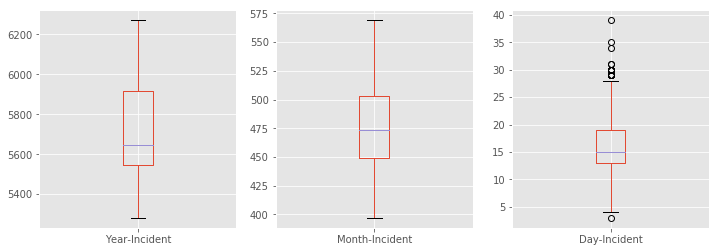

In [11]:
# boxplots of fire incidents 
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
year = pd.DataFrame({'Year-Incident' : (data1319.groupby( ['CalYear'] ).size())}).reset_index()
yearbp = year.boxplot(column=['Year-Incident'])

plt.subplot(1, 3, 2)
month =pd.DataFrame({'Month-Incident' : (data1319.groupby( ['CalYear','Month'] ).size())}).reset_index() 
monthbp = month.boxplot(column='Month-Incident')

plt.subplot(1, 3, 3)
day =pd.DataFrame({'Day-Incident' : (data1319.groupby( ['CalYear','Month','Day'] ).size())}).reset_index() 
daybp = day.boxplot(column=['Day-Incident'])

In [12]:
# show the outliers
day_outlier = day.loc[(day['Day-Incident']>28) | (day['Day-Incident']<4) ]
day_outlier

,CalYear,Month,Day,Day-Incident
32,2013,2,02,31
51,2013,2,21,29
312,2013,11,09,30
439,2014,3,16,30
502,2014,5,18,35
751,2015,1,22,29
792,2015,3,04,30
797,2015,3,09,29
831,2015,4,12,29
853,2015,5,04,30


In order to display the hotspot in London borough in each year (since the ward scale geojson data is not available), the data is needed to be grouped by year. Afterwards, we divide the incidents by borough area, and then the data will be used to create choropleth maps.

In [13]:
#prepare spatial join data, count each borough incidents by year 
yearData = pd.DataFrame({'Record' : data1319.groupby( ['CalYear','IncGeo_BoroughCode','IncGeo_BoroughName'] ).size()}).reset_index()

# this csv contains the area (km2) of London borough 
london_area=pd.read_csv('london-borough-profiles.csv')

# create a borData list to append each year dataframe for folium mapping
borData=[]
for i in range(2013,2020):
    joinData = yearData.loc[yearData.CalYear==i].merge(london_area, left_on='IncGeo_BoroughCode', right_on='Code')
    borData.append(joinData)
    
# calculate fire incidents per area(km2)   
for i in range(0,len(borData)):
    borData[i]['FireInc']=borData[i]['Record'].values/borData[i]['Inland_Area_(km)'].values

borData[0].head(10)

,CalYear,IncGeo_BoroughCode,IncGeo_BoroughName,Record,Code,Inland_Area_(km),FireInc
0,2013,E09000001,CITY OF LONDON,7,E09000001,2.90,2.413793
1,2013,E09000002,BARKING AND DAGENHAM,159,E09000002,36.11,4.403212
2,2013,E09000003,BARNET,242,E09000003,86.75,2.789625
3,2013,E09000004,BEXLEY,119,E09000004,60.58,1.964345
4,2013,E09000005,BRENT,236,E09000005,43.23,5.459172
5,2013,E09000006,BROMLEY,162,E09000006,150.13,1.079065
6,2013,E09000007,CAMDEN,200,E09000007,21.79,9.178522
7,2013,E09000008,CROYDON,258,E09000008,86.50,2.982659
8,2013,E09000009,EALING,217,E09000009,55.54,3.907094
9,2013,E09000010,ENFIELD,236,E09000010,80.83,2.919708


Due to the fact that Jupyter Notebook can not render the map, so the map is embedded into html format, and this chunk of code takes approximately two minutes to run. The html file needs to be launched separately. Besides, for the sake of running this code the notebook geo environment should be activated in advance, otherwise it might run into errors.

According to the choropleth map, it appears that the central London tends to have high density of fire occurrence over these years. On the other hand, the occurrence declines along outskirt of London.

- embed function code is available from the link: https://github.com/python-visualization/folium/issues/1003 
- folium featureGroup tutorial can be consulted from this link: https://www.nagarajbhat.com/post/folium-visualization/


In [14]:
import folium
import json
import branca.colormap as cm


# set centre and zoom level
m = folium.Map(
    location=[51.5, -0.1],
    zoom_start=10
)

import geopandas as gpd
london = gpd.read_file('london.geojson') # load borough file

# create featuregroup for each layer
feature_group0 = folium.FeatureGroup(name='Year 2013',overlay=True,show=True ).add_to(m)
feature_group1= folium.FeatureGroup(name='Year 2014',overlay=True,show=False  ).add_to(m)
feature_group2= folium.FeatureGroup(name='Year 2015',overlay=True,show=False ).add_to(m)
feature_group3= folium.FeatureGroup(name='Year 2016',overlay=True,show=False ).add_to(m)
feature_group4= folium.FeatureGroup(name='Year 2017',overlay=True,show=False ).add_to(m)
feature_group5= folium.FeatureGroup(name='Year 2018',overlay=True,show=False ).add_to(m)
feature_group6= folium.FeatureGroup(name='Year 2019',overlay=True,show=False).add_to(m)

fg = [feature_group0,feature_group1,feature_group2,feature_group3,feature_group4,feature_group5,feature_group6]


# loop through borData to create choropleth maps
for i in range(len(borData)): 
    chorop = folium.Choropleth(
    geo_data=london,
    name='Year 2013 Fire_Incidents',
    data=borData[i],
    columns=['IncGeo_BoroughCode','FireInc'],
    key_on='feature.properties.id',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Fire_Incidents'
    ).geojson.add_to(fg[i])



# add geojson to map
geojson1 =folium.GeoJson(
    london,
    name='geojson',
    tooltip=folium.GeoJsonTooltip(fields=['LAD13NM'],labels=False,sticky=False),
).add_to(m)

folium.LayerControl().add_to(m)

#set up legend
legend = cm.LinearColormap(colors=['lightyellow','red'], index=[15,45],vmin=0,vmax=60)

legend.add_to(m)

# define embed map funcation
def embed_map(m):
    from IPython.display import HTML

    m.save('index.html')
    with open('index.html') as f:
        html = f.read()

    iframe = '<iframe srcdoc="{srcdoc}" style="width: 100%; height: 750px; border: none"></iframe>'
    srcdoc = html.replace('"', '&quot;')
    return HTML(iframe.format(srcdoc=srcdoc))


embed_map(m)

C:\Users\User\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\User\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\User\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes:

As for the temporal pattern investigation, the heatmap is utilised to demonstrate the relationship between different timeframes. There are three heatmaps, including year and month, month and day, and day and hour relationships. First of all, it hard to see if there is a tendency indicating fire incidents that concentrate on which season, however, it is much clear that the amount of incidents declines over years (left figure). In terms of the relationship between month and day, there is no obvious pattern, too(central figure). Additionally, right heatmap shows fire incidents concentrate on afternoon and evening. 

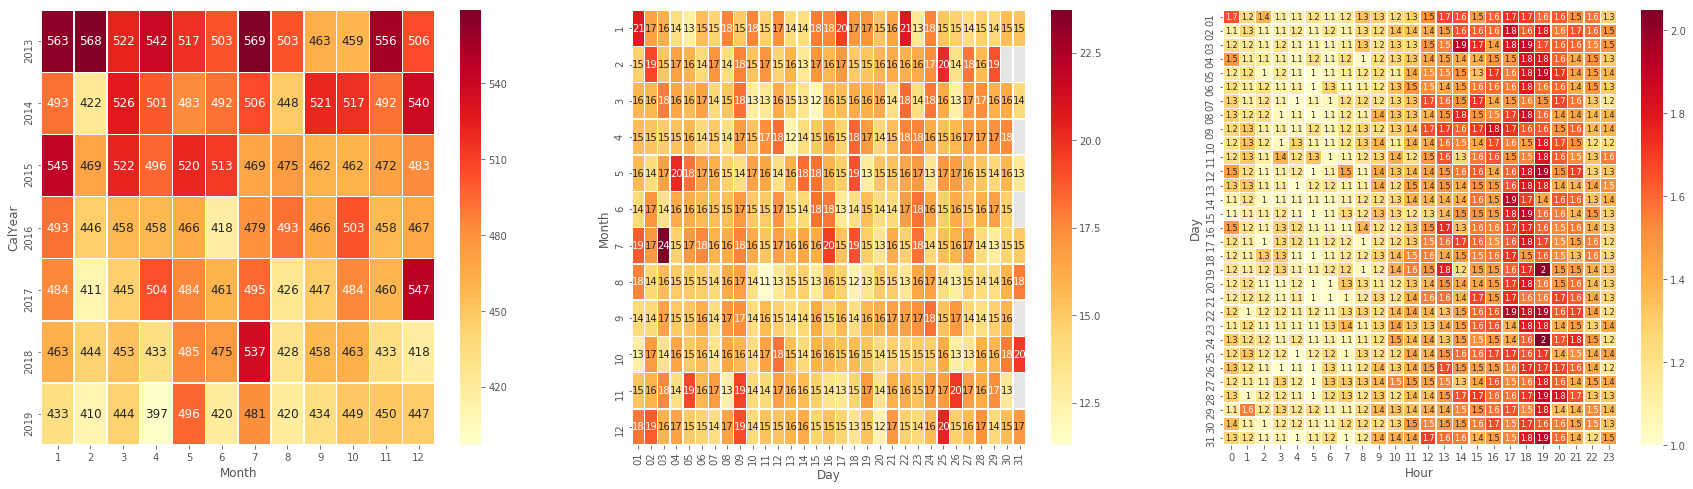

In [15]:
# heatmap of different period time trend

fig = plt.figure(figsize=(30, 8))

plt.subplot(1, 3, 1)
# plot year and month heatmap  
month_pi = month.pivot("CalYear", "Month", "Month-Incident")
ax0 = sns.heatmap(month_pi, linewidth=0.5, annot=True,fmt="d",cmap="YlOrRd",annot_kws={"size": 12})

plt.subplot(1, 3, 2)
# plot month and day heatmap  
day_pi =day.reset_index().pivot_table("Day-Incident","Month", "Day" )
ax1 = sns.heatmap(day_pi,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

plt.subplot(1, 3, 3)
# plot day and hour heatmap
dayHeat = pd.DataFrame({"Hour-Incident":data1319.groupby(['CalYear','Month','Day','Hour']).size()}).reset_index()
daydata =dayHeat.reset_index().pivot_table( "Hour-Incident","Day", "Hour")
ax2 = sns.heatmap(daydata,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 8})

## 3 Methodology

To examine the relationship between social-economic factors and fire incident occurrence this work applies three regression algorithms that are liner regression, Lasso regression, and PCA liner regression. Due to the fact that these methods embedding different algorithms, by comparing the results we may find better model for this dataset and in turn better understand the relationship.

Liner regression combining with dealing multicollinearity method is able to reduce the instability of the estimates of the coefficients so as to enhance the performance of the model. Lasso regression suits for dealing with multicollinearity, it applies L1 Regularization, which results in few coefficients and help features selection. Therefore, it increases the interpretability of the data. (Stephanie, 2015) As for PCA excels at reducing dimensionality, simultaneously it also minimizing information loss by maximise variance. (Jolliffe and Cadima, 2016) 

### 3.1 Linear Regression
To begin with liner regression, the multicollinearity of the predictors are needed to be examined. 
#### 3.1.1Multicollinearity Examine
The multicollinearity between each independent variables is checked by calculating Pearson correlation coefficient, and performed by cluster map based on seaborn library. Through this map we can detect there are several correlation coefficients that are large than 0.5, this may imply they exist multicollinearity, which should be removed, otherwise they would result in redundant information.(Stephanie, 2015)


<Figure size 2160x720 with 0 Axes>

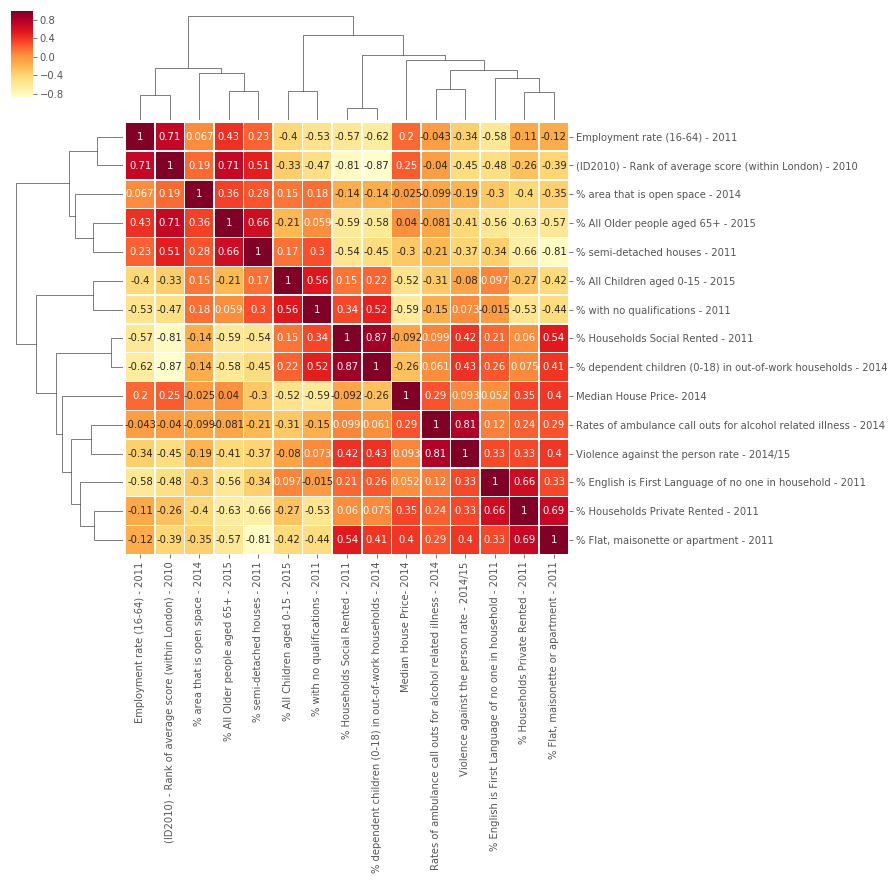

In [16]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))
df = x_var
df = pd.DataFrame(df)
corr = df.corr()

ax_ =sns.clustermap(corr,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

#### 3.1.2 Variance inflation Factor Calculation
In order to decide which variables should be removed, the variance inflation factor (VIF) is calculated to quantify the collinearity. Based on the thumb rule if the VIF is over 10, the predictors are omitted. (online.stat.psu.edu, n.d.) Therefore, only the 'rate of open space', 'Median House Price', 'Rates of ambulance call outs for alcohol related illness - 2014' do not exceed 10, and then are kept to perform the liner regression.

In [17]:
# VIF package
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif_zz = pd.DataFrame()
vif_zz["VIF Factor"] = [variance_inflation_factor(x_var.values, i) for i in range(x_var.shape[1])]
vif_zz["features"] = x_var.columns


vif_zz

,VIF Factor,features
0,49.805130,% All Older people aged 65+ - 2015
1,62.719526,% All Children aged 0-15 - 2015
2,14.020179,% English is First Language of no one in house...
3,6.675257,Rates of ambulance call outs for alcohol relat...
4,188.960658,Employment rate (16-64) - 2011
5,8.237672,Median House Price- 2014
6,41.980794,(ID2010) - Rank of average score (within Londo...
7,75.399715,% Households Private Rented - 2011
8,37.212332,% Households Social Rented - 2011
9,54.553236,"% Flat, maisonette or apartment - 2011"


In [18]:
# subset variables which VIF is under 10
x_vif=x_var[['% area that is open space - 2014','Median House Price- 2014','Rates of ambulance call outs for alcohol related illness - 2014']]


In [19]:
# code is from stackflow:https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
# fit x_vif to linear regression 
import statsmodels.api as sm
X = sm.add_constant(x_vif)
ols = sm.OLS(y_var, X)
ols_fit = ols.fit()

print(ols_fit.summary())


                            OLS Regression Results                            
Dep. Variable:             Occurrence   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.115
Date:                Thu, 07 May 2020   Prob (F-statistic):            0.00169
Time:                        13:38:48   Log-Likelihood:                -231.29
No. Observations:                 571   AIC:                             470.6
Df Residuals:                     567   BIC:                             488.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.2 LASSO Regression
Regularization and feature selection are two main tasks that LASSO exhibits, by achieving the goals LASSO applies a shrinking or called regularisation process to limit the sum of the absolute values of the regression coefficients.  Hence, LASSO can improve the prediction accuracy and them increase the model interpretability by shrinkage process and remove the coefficients to reduce the variance. The regularisation process is controlled by tuning λ (or $\alpha$) parameter, when λ increases, bias increases and then variance decreases.(Fonti and Belitser, 2017)

The equation is expressed as following:

$\sum_{i=0}^n (y_i - \sum_{j} x_{i_j} \beta_j)^2 + \lambda \sum_{j=0}^p |\beta_j|$

The dataset contains two measure units, which are percentage and integer (house price and rank of Indices of Deprivation score), and since LASSO introduces constraint in the model, so it is necessary to standardise the variables. Here, instead of applying normalisation setting in the LASSO function StandardScaler library is utilised to maintain the scale.



In [20]:
# standarise variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_var)
x_tran=scaler.transform(x_var)

In [21]:
# fit the model
from sklearn import linear_model

lasso_model_0 = linear_model.Lasso(max_iter=10e7,alpha=0.01)
lasso_model_0.fit(X=x_tran, y=y_var)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
# accuracy score
lasso_model_0.score(X=x_tran, y=y_var)

0.5691892720535247

In [23]:
# tuning alpha
alpha = np.linspace(0.01,1,10)

from sklearn.metrics import mean_squared_error
for i in alpha:
    lasso_model = linear_model.Lasso(max_iter=10e7,alpha=i)
    lasso_model.fit(X=x_tran, y=y_var)
    print(lasso_model.score(X=x_tran, y=y_var))


0.5691892720535247
0.37152738391136164
0.07190368962351357
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### 3.3 PCA Linear Regression

The main idea of PCA algorithm is to find the uncorrelated variables to maximise the variance.(Jolliffe and Cadima, 2016) Hence, by choosing the variables with larger variance might be able to enhance the accuracy of the high dimensional regression model. 

This work applies PCA to extract the three variables representing largest portion of variance, and implements linear regression with chosen variables.


In [24]:
# extract column names and turn them into list for later use
lst_x = x_var.columns.tolist()

In [25]:
# fit PCA model
from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X = pca.fit_transform(x_tran)

In [26]:
# check PCA component
PrincipleComp = pd.DataFrame(pca.components_, columns = lst_x)
PrincipleComp

,% All Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% English is First Language of no one in household - 2011,Rates of ambulance call outs for alcohol related illness - 2014,Employment rate (16-64) - 2011,Median House Price- 2014,(ID2010) - Rank of average score (within London) - 2010,% Households Private Rented - 2011,% Households Social Rented - 2011,"% Flat, maisonette or apartment - 2011",% semi-detached houses - 2011,% dependent children (0-18) in out-of-work households - 2014,% with no qualifications - 2011,% area that is open space - 2014,Violence against the person rate - 2014/15
0,-0.357647,0.029557,0.265651,0.126702,-0.270956,0.015802,-0.363014,0.251628,0.332109,0.305322,-0.322005,0.329382,0.040430,-0.161864,0.268879
1,-0.011733,-0.387400,0.037178,0.193511,0.261898,0.381008,0.220408,0.319623,-0.162494,0.281443,-0.195483,-0.233835,-0.474836,-0.136693,0.061620
2,0.238517,-0.197189,-0.254613,0.620329,0.002647,0.106995,0.026812,-0.267394,0.130144,-0.016440,0.091796,0.109514,0.169170,0.204827,0.512558
3,-0.027935,0.205143,0.518182,0.301990,-0.226225,-0.104019,0.070345,0.242362,-0.382853,-0.290074,0.261585,-0.266736,0.047545,-0.155390,0.273934
4,0.026752,0.124573,0.216848,-0.066331,-0.272592,0.417392,-0.020124,0.081629,-0.012286,-0.004293,-0.106094,-0.073764,-0.044112,0.806291,-0.088515
5,0.367287,-0.478877,0.276956,-0.156910,-0.400743,0.345666,-0.014258,-0.128995,0.090026,0.026890,0.218914,0.102419,0.207044,-0.297888,-0.196682
6,-0.083891,0.552438,-0.214391,0.052925,-0.111013,0.614882,0.059119,-0.214485,0.127885,-0.136341,-0.064678,-0.129715,-0.053872,-0.374415,0.008107
7,-0.484030,-0.122998,0.148197,-0.097101,0.351391,0.246656,-0.094791,-0.066488,0.168095,-0.105768,0.650628,0.180617,-0.104858,0.090247,0.083383
8,0.036621,-0.082084,-0.083153,-0.064232,0.369142,0.306418,-0.327673,0.270633,-0.392501,-0.285587,-0.234136,0.198107,0.488811,-0.031905,0.021788
9,-0.471743,-0.393000,-0.412603,-0.021122,-0.473019,-0.032270,-0.057783,-0.001123,-0.153902,-0.405006,-0.086522,-0.125530,-0.114711,0.007818,0.003690


In [27]:
# print ratio of variance of components
print(pca.explained_variance_ratio_)

[0.37152039 0.24438974 0.10343646 0.08270304 0.05818095 0.04342718
 0.02996368 0.01635528 0.01416632 0.00985084 0.00772384 0.00635201
 0.0052712  0.0044842  0.00217486]


In [28]:
# train and test data
from sklearn.model_selection import train_test_split
X_pca = X[:,[0,1,2]]
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_pca, y_var, random_state=split_rand_state)

In [29]:
X3 = sm.add_constant(test_X_pc)
est1 = sm.OLS(test_y_pc, X3)
est3 = est1.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:             Occurrence   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     61.32
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.56e-25
Time:                        13:39:25   Log-Likelihood:                 1.4563
No. Observations:                 143   AIC:                             5.087
Df Residuals:                     139   BIC:                             16.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0729      0.021     51.448      0.0

## 4 Results and Discussion

### 4.1  Results Comparison
Overall, the accuracy of these three models LASSO and PCA linear regression outperform Linear Regression with approximately 0.56 of accuracy, however, OLR only achieves R-squared 0.026.

By looking at linear regression model we can find the p-value of 'Median House Price- 2014' variable is still over 0.05, perhaps this should be removed so as to increase R-squared score. Besides, the predictors in this dataset contain two measure units, however, these variables were not standardised or normalised in advance. As a result, the model is not accurate. In addition, based on the fitted-residual values plot, the residual values seem unbalanced, which it may imply the model is nonlinear. (docs.statwing.com, n.d.) Hence, in order to improve the accuracy we might not only need to standardise the variables, but also have to consider using other regression methods rather than liner regression.


In [30]:
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Occurrence   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.115
Date:                Thu, 07 May 2020   Prob (F-statistic):            0.00169
Time:                        13:39:28   Log-Likelihood:                -231.29
No. Observations:                 571   AIC:                             470.6
Df Residuals:                     567   BIC:                             488.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Text(0, 0.5, 'Residuals')

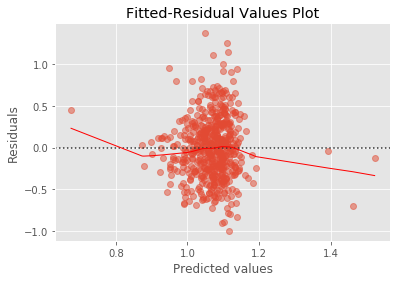

In [31]:
# plt fit-residual plot
sns.residplot(ols_fit.fittedvalues, y_var['Occurrence'], lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'r', 'lw':1})
plt.title('Fitted-Residual Values Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

As for the result of LASSO regression, it achieves the highest accuracy at 0.56 with mean square error at 0.058(calculated in below cell), when alphas is set as 0.01. The feature selection process visualises as below. The results show 9 of variables have been chosen. Among those chosen variables rate of children, rate of non-native English speaker at home, rate of private rented house or social rented house, and Violence against the person rate all contribute positive effect towards fire occurrence. Besides, although, Indices of Deprivation Rank contributes negative effect, it is due to the large the rank score meaning the less the deprivation. So we could say deprivation situation also has positive relationship with fire incidents. According to these factors, it seems to imply fire occurrence associates with socially vulnerable households. Perhaps, because of lacking of preventing fire accidents knowledge or being not able to access to fire detection devices or fire alarm systems results in higher fire incidents.

Regarding other property characters, higher flat and apartment rate lead to higher fire occurrence. Since flat or apartment accommodate more households than houses, this may be the reason to increase the fire incidents. So, semi-detached house, on the other hand, contributes negative effect. As for rate of open space, it has positive relationship with fire occurrence, which is not expected. This factor might be needed further investigation of the specific areas.


(7.625679725691093e-06,
 0.4105930145610602,
 -0.12453479337054177,
 0.18484891378691592)

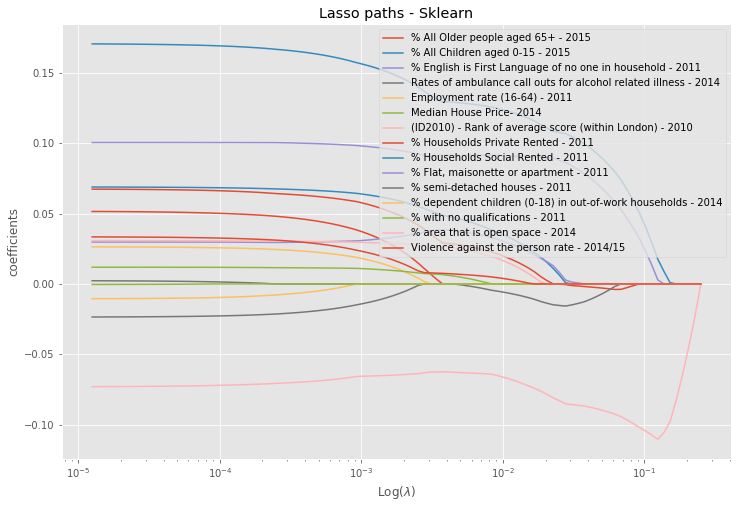

In [32]:
# plot lasso path
eps= 5e-5
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(x_tran, y_var, eps ,fit_intercept=False)

plt.figure(figsize = (12,8))

for i in range(15):
    plt.plot(alphas_lasso, coefs_lasso[-1][i], label =x_var.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [33]:
# print(lasso_model.coef_)
coef_lasso = pd.DataFrame({"variable": x_var.columns.values, "coefficient":lasso_model_0.coef_})
print(coef_lasso)

                                             variable  coefficient
0                  % All Older people aged 65+ - 2015    -0.000000
1                     % All Children aged 0-15 - 2015     0.035146
2   % English is First Language of no one in house...     0.091429
3   Rates of ambulance call outs for alcohol relat...     0.000000
4                      Employment rate (16-64) - 2011    -0.000000
5                            Median House Price- 2014     0.000000
6   (ID2010) - Rank of average score (within Londo...    -0.066423
7                  % Households Private Rented - 2011     0.019733
8                   % Households Social Rented - 2011     0.123648
9              % Flat, maisonette or apartment - 2011     0.030682
10                      % semi-detached houses - 2011    -0.005831
11  % dependent children (0-18) in out-of-work hou...     0.000000
12                    % with no qualifications - 2011    -0.000000
13                   % area that is open space - 2014     0.01

In [34]:
# lasso mean square error 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_var, lasso_model_0.predict(x_tran))

0.058243439674343235

With respect to PCA linear regression, it also achieves fairly well accuracy at 0.56 by using the 3 components that contribute the most variance. However, since PCA has recentralised the values with a given weight to compose the component, it is unlikely to well interpret origin variables. On the other hand, it helps cope with the multicollinearity problems, and reduce the dimensions, as well as contributing to improve the model accuracy.   

Based on the summary of linear regression model, we find p-value of PC3 is still larger than 0.05, perhaps to be able to further improve the accuracy, the model has to consider if the third PC3 should be included. 
  

In [35]:
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:             Occurrence   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     61.32
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.56e-25
Time:                        13:39:47   Log-Likelihood:                 1.4563
No. Observations:                 143   AIC:                             5.087
Df Residuals:                     139   BIC:                             16.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0729      0.021     51.448      0.0

## 5 Conclusion

This work carries out the two main objectives. First of all, we can find the fire occurrence has the tendency to concentrate on the centre of London. As for the temporal pattern, it appears that fire incidents are inclined to aggregate during afternoon and evening, which may be related to human activity patterns, however, the patterns in month or year are not clear. With respect to the amount of fire incident, it has declined through these years. 

As for the 3 algorithms, in terms of the interpretability LASSO outperforms the other 2 methods. Regrading to accuracy, Lasso and PCA regression have better prediction. For improving linear regression, it is needed to standardise the variables, or reconsider the which variables should be included. 

The results of the model demonstrate that fire occurrence may be associated with vulnerable groups. Hence, if policy makers are able to provide more precaution methods or related knowledge for them to reinforce the fire security, the fire incidents might be able to be prevented. Additionally, London authority also needs to widely advocate the measures of preventing fire from occurring in the centre of London especially, since occurrence rate is higher there. 
   

## Reference

Duncanson, M., Woodward, A. and Reid, P. (2002). Socioeconomic deprivation and fatal unintentional domestic fire incidents in New Zealand 1993–1998. Fire Safety Journal, 37(2), pp.165–179.

Beaulieu, E., Smith, J., Zheng, A. and Pike, I. (2019). Association between neighbourhood socioeconomic features and residential fire incidence, related casualties and children: a cross-sectional population-based study in 4 Canadian provinces. CMAJ Open, 7(3), pp.E562–E567.

Holborn, P.., Nolan, P.. and Golt, J. (2003). An analysis of fatal unintentional dwelling fires investigated by London Fire Brigade between 1996 and 2000. Fire Safety Journal, 38(1), pp.1–42.

www.ons.gov.uk. (n.d.). Number of households by postcode area - Office for National Statistics. [online] Available at: https://www.ons.gov.uk/aboutus/transparencyandgovernance/freedomofinformationfoi/numberofhouseholdsbypostcodearea [Accessed 4 May 2020].

Jolliffe, I.T. and Cadima, J. (2016). Principal component analysis: a review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), p.20150202.

Stephanie (2015). Lasso Regression: Simple Definition. [online] Statistics How To. Available at: https://www.statisticshowto.com/lasso-regression/.

Stephanie (2015). Multicollinearity: Definition, Causes, Examples. [online] Statistics How To. Available at: https://www.statisticshowto.com/multicollinearity/.

online.stat.psu.edu. (n.d.). 10.7 - Detecting Multicollinearity Using Variance Inflation Factors | STAT 462. [online] Available at: https://online.stat.psu.edu/stat462/node/180/ [Accessed 6 May 2020].

Fonti, V. and Belitser (2017). Feature Selection using LASSO. [online] Available at: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf.

docs.statwing.com. (n.d.). Interpreting residual plots to improve your regression | Statwing Documentation. [online] Available at: http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#x-unbalanced-header [Accessed 4 May 2020].


words count:2507